# <b>Milestone 1

##<b>Problem Definition</b>
**The context:** Why is this problem important to solve?<br>

Detecting the Plasmodium parasite can have long reaching health consequeces for those who have it and could even save their lives. 50% of the world's population is in danger from it as well so doing this reseach is highly relevant to mainstream medicine's objectives. As a way to catch more cases of infection and to catch them earlier machine learning can be a highly effective tool as has already been proven by other models. 

**The objectives:** What is the intended goal?<br>

A computer vision model that can identify parasitized red blood cells with accuracy above humans. It should function efficiently with regard to computational time. 

**The key questions:** What are the key questions that need to be answered?<br>
What are the features of cell images that distinguish between parasitized and uninfected? What model is the most accurate at detection? 

**The problem formulation:** What is it that we are trying to solve using data science?

We are trying to reduce the time and error of detection methods so we can submit an image to the model and be able to tell a medical patient if they have the parasite or not. 

## <b>Data Description </b>

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>


## <b>Important Notes</b>

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdowns cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques. 

###<b> Mounting the Drive

In [16]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### <b>Loading libraries</b>

In [40]:
# Importing libraries required to load the data
import zipfile

import os

from PIL import Image

import numpy as np

import pandas as pd

from pandas import value_counts

import matplotlib.pyplot as plt

import seaborn as sns

from seaborn import barplot, pairplot

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

### <b>Let us load the data</b>

**Note:** 
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [31]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/Colab Notebooks/cell_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:

    zip_ref.extractall()

The extracted folder has different folders for train and test data which further contains the different sizes of images for parasitized and uninfected cells within the respective folder name. 

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model. 

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [19]:
# Storing the path of the extracted "train" folder 
train_dir = '/content/cell_images/train'

# Size of image so that each image has the same size
SIZE = 64

# Empty list to store the training images after they are converted to NumPy arrays
train_images = []

# Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [20]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']: 
    
    # Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
    
        try:
    
            # Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
            
                train_labels.append(1)
           
            else:
           
                train_labels.append(0)
        
        except Exception:
       
            pass       

# Converting lists to arrays
train_images = np.array(train_images)

train_labels = np.array(train_labels)

In [21]:
# Storing the path of the extracted "test" folder 
test_dir = '/content/cell_images/test'

# Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

# Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

# Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [22]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):

        try:
            # Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))
            
            # Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))
            
            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':

                test_labels.append(1)

            else:

                test_labels.append(0)

        except Exception:

            pass       

# Converting lists to arrays
test_images = np.array(test_images)

test_labels = np.array(test_labels)

###<b> Checking the shape of train and test images

In [23]:
# Shape of images
print(train_images.shape)
print(test_images.shape)

(24958, 64, 64, 3)
(2600, 64, 64, 3)


###<b> Checking the shape of train and test labels

In [24]:
# Shape of labels 
print(train_labels.shape)
print(test_labels.shape)

(24958,)
(2600,)


####<b> Observations and insights:
The shape of the train images is 24958 images with dimentions of 64 x 64 and 3 colors dimentions for each pixel. For the test set we have 2600 images with dimentions of 64 x 64 and 3 colors dimentions for each pixel.   

The number of labels for train and test sets match the number of images which is ideal because it tells us that all of the images are labeled.  _____


### <b>Check the minimum and maximum range of pixel values for train and test images

In [25]:
# Try to use min and max function from numpy
print(train_images.max())
print(train_images.min())
print(test_images.max())
print(test_images.min())

255
0
255
0


### <b> Observations and insights: 
These numbers represent the range of values of pixels. They range from 0-255. The value of a pixel represents its shade.



###<b> Count the number of values in both uninfected and parasitized 

---



In [34]:
# Try to use value_counts to count the values
pd.DataFrame(train_labels).value_counts()


1    12582
0    12376
dtype: int64

In [52]:
pd.DataFrame(test_labels).value_counts()

0    1300
1    1300
dtype: int64

###<b>Normalize the images

In [27]:
# Try to normalize the train and test images by dividing it by 255 and convert them to float32 using astype function
train_images = (train_images/255).astype('float32')

test_images = (test_images/255).astype('float32')

####<b> Observations and insights: 
In the normalization step we put the values of the pixels between 0 and 1 so the model can perform and converge faster.

###<b> Plot to check if the data is balanced

In [76]:
import seaborn
# You are free to use bar plot or pie-plot or count plot, etc. to plot the labels of train and test data and check if they are balanced
pd.DataFrame(train_labels)

,0
0,1
1,1
2,1
3,1
4,1
...,...
24953,0
24954,0
24955,0
24956,0


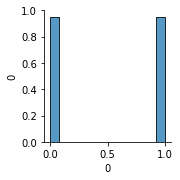

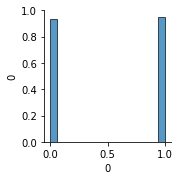

In [67]:

sns.pairplot(pd.DataFrame(test_labels))
sns.pairplot(pd.DataFrame(train_labels))

####<b> Observations and insights: _
It looks like balaced data. ____

### <b>Data Exploration</b>
Let's visualize the images from the train data

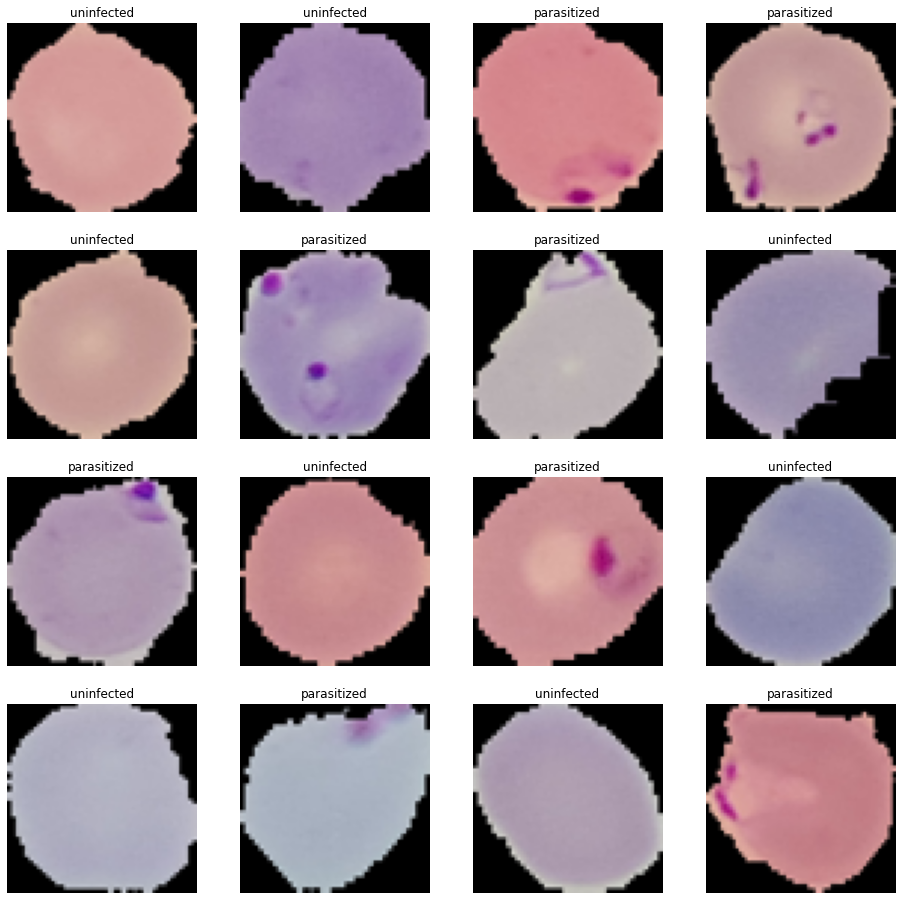

In [39]:
# This code will help you in visualizing both the parasitized and uninfected images
np.random.seed(42)

plt.figure(1, figsize = (16 , 16))

for n in range(1, 17):

    plt.subplot(4, 4, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1: 

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')

####<b> Observations and insights: 
The paracitized cells all have red matter (the Plasmodium parasite) in varying shapes inside them. They may also have something that looks like an air bubble. The uninfected cells look blue and empty. The cells themselves have different shapes, most are circular. 

###<b> Similarly visualize the images with subplot(6, 6) and figsize = (12, 12)

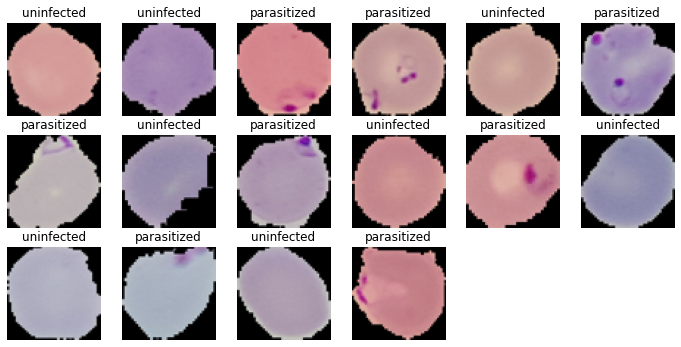

In [79]:
# Hint: Have a keen look into the number of iterations that the for loop should iterate

np.random.seed(42)

plt.figure(1, figsize = (12 , 12))

for n in range(1, 17):

    plt.subplot(6, 6, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1: 

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')

####<b>Observations and insights:

###<b> Plotting the mean images for parasitized and uninfected

In [80]:
# Function to find the mean
def find_mean_img(full_mat, title):

    # Calculate the average
    mean_img = np.mean(full_mat, axis = 0)[0]

    # Reshape it back to a matrix
    plt.imshow(mean_img)

    plt.title(f'Average {title}')

    plt.axis('off')

    plt.show()

    return mean_img

<b> Mean image for parasitized

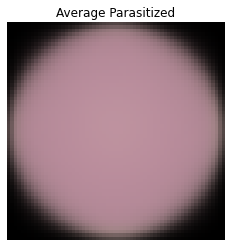

In [78]:
# If the label = 1 then the image is parasitised and if the label = 0 then the image is uninfected
parasitized_data = []  # Create a list to store the parasitized data

for img, label in zip(train_images, train_labels):

        if label == 1:
              
              parasitized_data.append([img])          

parasitized_mean = find_mean_img(np.array(parasitized_data), 'Parasitized')   # find the mean

<b> Mean image for uninfected

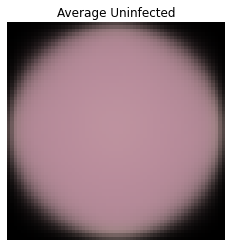

In [81]:
# Similarly write the code to find the mean image of uninfected

uninfected_data = []  # list to store uninfected data

for img, label in zip(train_images, train_labels):

        if label == 1:
              
              uninfected_data.append([img])          

uninfected_mean = find_mean_img(np.array(uninfected_data), 'Uninfected')   # find the mean


####<b> Observations and insights: _____
The uninfected mean image and the paracited mean image are identical to the naked eye. 

### <b>Converting RGB to HSV of Images using OpenCV

###<b> Converting the train data

In [82]:
import cv2

gfx=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(train_images[i], cv2.COLOR_BGR2HSV)
  
  gfx.append(a)

gfx = np.array(gfx)

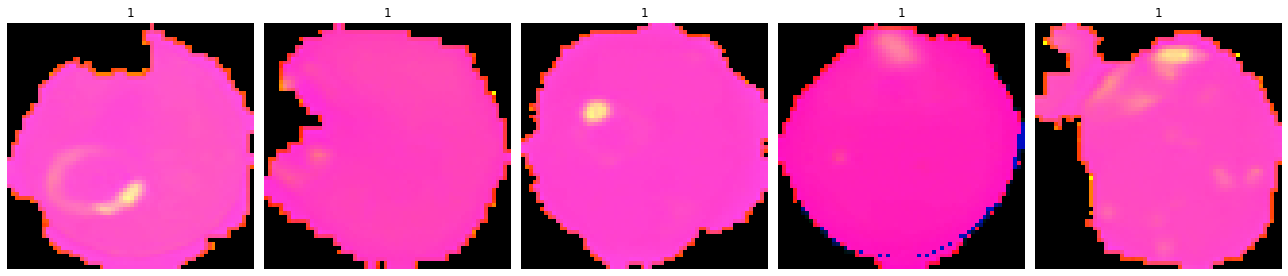

In [83]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()
  
  fig.tight_layout()

###<b> Converting the test data

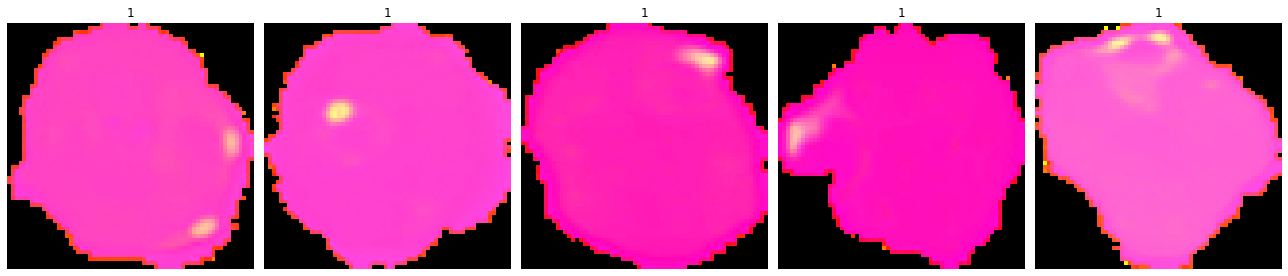

In [84]:
# Similarly you can visualize for the images in the test data
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()
  
  fig.tight_layout()

####<b>Observations and insights: 
Converting the images to HSV, Hue, Saturation and Value, a process more similar to how the human eye percieves, will help our model better detect parasitic cell images. HSV tends to be better for object detection in general. 'Hue' represents the color,'Saturation' represents how much white is mixed with the color, and 'Value' represents how much black is mixed with the color.

It looks like specks of green or yellow indicate a high likelihood of a parasite. _____

###<b> Processing Images using Gaussian Blurring

###<b> Gaussian Blurring on train data

In [85]:
gbx = []  # To hold the blurred images

for i in np.arange(0, 100, 1):

  b = cv2.GaussianBlur(train_images[i], (5, 5), 0)

  gbx.append(b)

gbx = np.array(gbx)

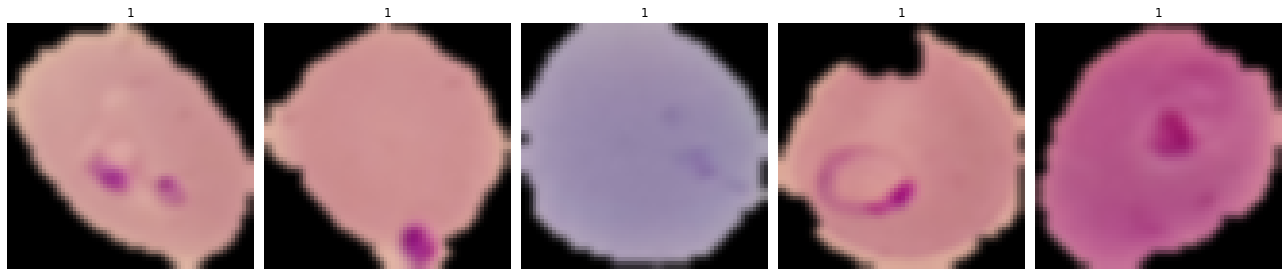

In [86]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  
  ax[t].imshow(gbx[i])
  
  ax[t].set_axis_off()
  
  fig.tight_layout()

###<b> Gaussian Blurring on test data

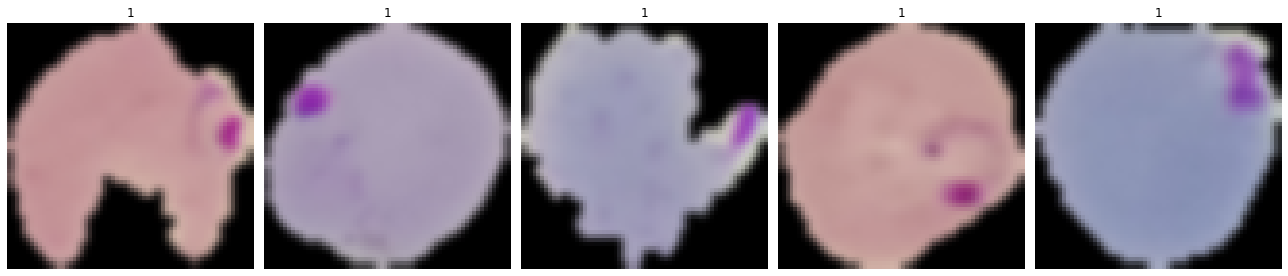

In [87]:
# Similarly you can apply Gaussian blurring for the images in the test data
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)

  
  ax[t].imshow(gbx[i])
  
  ax[t].set_axis_off()
  
  fig.tight_layout()

####**Observations and insights: **

The blur removes noise from images which helps with edge detection.
We did a mean blur, in which the kernel takes the mean of the pixels evenly accros the whole image.

**Think About It:** Would blurring help us for this problem statement in any way? What else can we try?

Rotating the images would help the model learn to identify parasites in images. 

## **Proposed approach**

**Potential techniques:** What different techniques should be explored?<br>

Changing the number of neurons in each layer. 

Changing the activation funtion fo hidden layers. 

Changing the type of optimizer and the hyperparameters.

Transfer learning if anyone has done this before us with other parasites.


**Overall solution design:** What is the potential solution design?<br>
A CNN network. 
 

**Measures of success:** What are the key measures of success to compare different techniques?<br>

Test accuracy.

The validation error is how we know the model is good. 

We want a low rate of false negatives because it is better that a person who does not have malaria believe they do because then they can take action to heal. If we send someone home with a false negative they could suffer health consequences.  